# Linear Regression 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt 
%matplotlib inline

In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# EDA

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

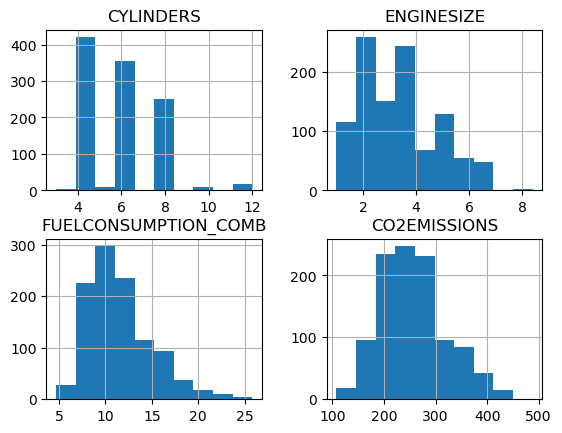

In [15]:
viz = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()

<Axes: xlabel='CYLINDERS', ylabel='Count'>

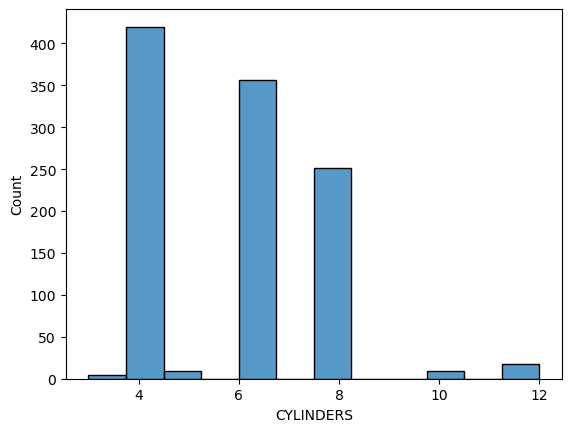

In [ ]:
sns.histplot(df['CYLINDERS'])

<Axes: xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_CITY'>

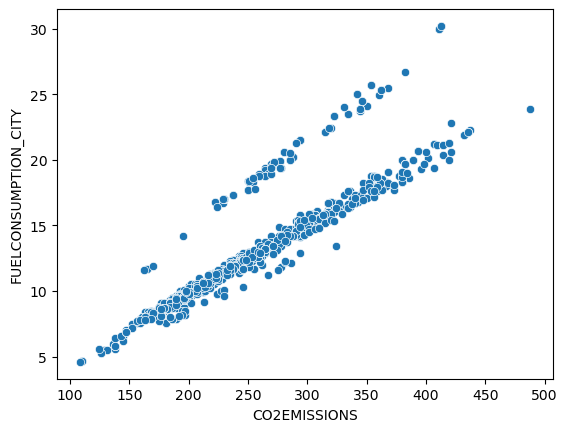

In [18]:
sns.scatterplot(df,x=df['CO2EMISSIONS'],y=df['FUELCONSUMPTION_CITY'])

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

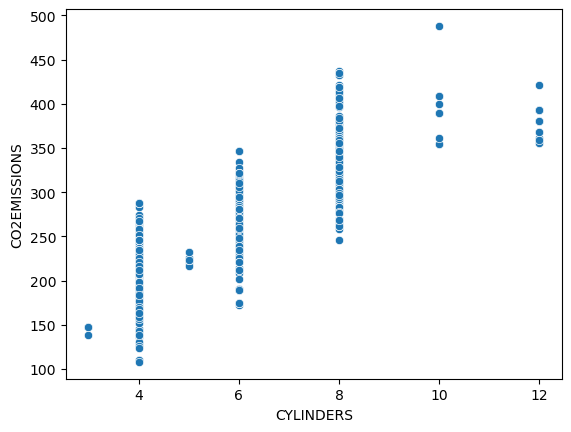

In [19]:
sns.scatterplot(df,x=df['CYLINDERS'],y=df['CO2EMISSIONS'])

# Train Test Split

In [20]:
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn import linear_model

In [34]:
regressor = linear_model.LinearRegression()
# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reset_index().to_numpy(), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  -0.011395971252986284
Intercept:  133.73460955774542


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

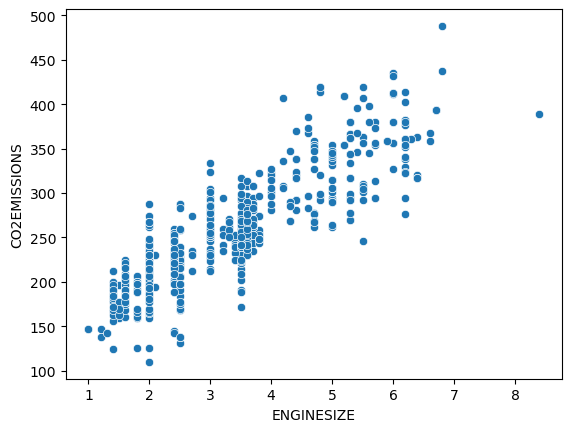

In [39]:
sns.scatterplot(x=X_train,y=y_train)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

prediction = regressor.predict(X=X_test.reset_index().to_numpy())
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(r2_score(y_test,prediction))

23.86916030341531
959.4161175898475
0.7644027215974804


<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

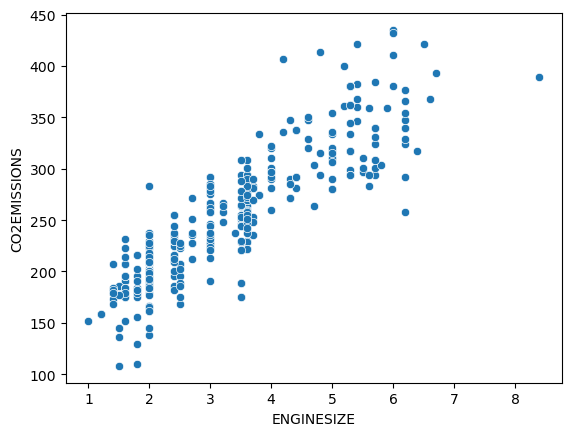

In [54]:
sns.scatterplot(x=X_test, y=y_test)

# Train FUELCONSUMPTION_COMB feature instead of cylinders

In [68]:
X = df['FUELCONSUMPTION_COMB']
y = df['CO2EMISSIONS']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [70]:
model = linear_model.LinearRegression()
model.fit(X_train.reset_index().to_numpy(),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
prediction_2 = model.predict(X_test.reset_index().to_numpy())

In [73]:
print(mean_squared_error(y_test,prediction_2))

799.5360170601963
